# <center><u>Introduction to data analysis using Python<u></center>
### <center>July 16-17th, 2023</center>
### <center>Eitan Hemed, PhD</center>
### <center>Department of Psychology, University of Haifa</center>

---

<p align="center">
<img src="https://cms.suse.net/sites/default/files/logo_images/University%20of%20Haifa%20web%20logo.png" width="200" height="200" >
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp
<img src="https://lh4.googleusercontent.com/sKK82jTk62GISl7t9caGgFNbIBCpkw5G_vsPM39XSyNhAr8p-LoNoKJFUPoudOk2l1BBrh962TqZslB-GhHWKBNjQ6is0gXcn1rEyLxsfqp51aVPnTuM0sJo36gIC8jgRA=w1280" width="200" height="200" />
</p>

# NumPy

NumPy ("Numerical Python") is not part of the standard library, meaning that this is a package that you need to install (specifically on Google Colab, it was already installed for you). However, it  is fundemental to almost all Python packages used for scientific or data-related work (espcially when working with small to medium-sized data). NumPy is used in other packages dedicated to wrangling and organizing data, plotting data, analyzing data and many more (see [here](https://numpy.org/)).

----

For most users, the main usage of NumPy are arrays (called N-Dimensional arrays, or ndarray for short). NumPy arrays are an ordered mutable collections, that are intended for numerical computation.

In [ ]:
# this is the common alias for import NumPy
import numpy as np

a = np.array([1, 2, 3, 5 ])

print(a) # looks like a regular list
print(a.mean(), a.std()) # built in descriptive statistics 
print(a ** 2) # easy to numerically manipulate, no need for loops and iterations
print(a * a) # can also be multiplied by other arrays

[1 2 3 5]
2.75 1.479019945774904
[ 1  4  9 25]
[ 1  4  9 25]


You might have heard that Python is a readable language at the expanse of execution speed. NumPy solves this issue (as it interfaces with code in C, a much faster language).

In [ ]:
a = np.arange(1e5) # range of integers between 0 and 100,000 (end-exclusive)
%timeit np.sum(a) # NumPy sum - result is in microseconds (1 / 1,000,000)
%timeit sum(a) # Vanilla Python sum - result is in milliseconds (1 / 1,000)

The slowest run took 5.18 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 40.6 µs per loop
100 loops, best of 5: 16.4 ms per loop


One of the reasons that NumPy is very fast has to do with how memory is allocated for Python objects vs. NumPy arrays. an store only a single type of values in an array. Objects are coerced into a different data type to fit the most 'complex' type.



In [4]:
a = np.full(5, True)
print(a) # all elements are booleans
a[-1] = 2
print(a) # the last element is coerced into a boolean as well

[ True  True  True  True  True]
[ True  True  True  True  True]


The same goes for strings.

In [8]:
a = np.linspace(start=-5, stop=5, num=10).round(2) # Get evenly spaced numbers
print(a, a.dtype) # the default type is float
a[3:5] = ['105.3', '7.7']
print(a, a.dtype) # the 4th and 5th elements is coerced into floats.

[-5.   -3.89 -2.78 -1.67 -0.56  0.56  1.67  2.78  3.89  5.  ] float64
[ -5.    -3.89  -2.78 105.3    7.7    0.56   1.67   2.78   3.89   5.  ] float64


#### Shape and indexing.

Where NumPy really begines to shine is arrays with more than one dimension. This allows us to create complex and flexible data structure.

Let's create an array with two dimensions - 3 rows and 4 columns. 

In [10]:
three_by_four = np.ones(shape=(3, 4)) # (y, x)
print(three_by_four)
print(three_by_four.shape)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
(3, 4)


Now we can begin selecting the array elements using both dimensions. Indexing of arrays with complex shapes is a breeze. 

Here we select the first and third rows (`0::2`), and all columns except the first (`1:`).

In [12]:
three_by_four[0::2, 1:] = 0
print(three_by_four)

[[1. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 0. 0. 0.]]


#### $\color{dodgerblue}{\text{Exercise}}$

We can change the shape of an array using the `reshape` method. First, create an array of the values 1 through 48 using `np.arange`. Then, reshape it into a different shape with 3 or more dimensions. Note that in order to fit all elements the product of the size of all axis must be the number of elements in the reshaped *array*.

In [ ]:
a = np.arange(1, 49)
print(a)

a = a.reshape(...)
print(a)

Another thing we will touch upon regarding NumPy array is Boolean Indexing. In boolean indexing we are using truth values to index an array. When NumPy arrays are checked for their truth values they (usually) return the value for each element. This is not especially complicated but it is a crucial topic when working with data frames, covered later. 


In [ ]:
x = np.array([-1, -15, 17, -7, 256])
positive_values_in_x = x > 0
print(positive_values_in_x)
print(x[x > 0])

[False False  True False  True]
[ 17 256]


#### $\color{dodgerblue}{\text{Exercise}}$

Create a 10 X 10 array of random numbers. Here we use the NumPy `random` module, to create an array from a uniform distribution. Round the values to three decimals. 

In [ ]:
np.random.seed(42) # So we would get the same numbers on each run. 

vals = np.random.random((10, 10)).round(3)

print(vals)

# Display vals max along columns (aggregating on rows)
print(vals.max(axis=1))

# Display vals min along rows (aggregating on columns)
print(vals.min(axis=0))

[[0.375 0.951 0.732 0.599]
 [0.156 0.156 0.058 0.866]
 [0.601 0.708 0.021 0.97 ]
 [0.832 0.212 0.182 0.183]]
[0.951 0.866 0.97  0.832]
[0.156 0.156 0.021 0.183]


* First, select all values that are greater than 0.5. What is the shape of the returned array?
* Then, select all the even columns (Axis 1) on the rows (Axis 0) that have a mean that is greater than 0.5.


In [ ]:
vals[vals > 0.5]
print(vals.shape)

vals[vals.mean(axis=0) > 0.5, 1::2]

(4, 4)


array([[0.156, 0.866],
       [0.212, 0.183]])

## Matplotlib

Matplotlib is the major library for scientific plotting in Python, that serves as backend to more high-level plotting libraries (one of them we'll use later). 

Naturally, you would want to use matplotlib like it is used below. However, Matplotlib offers a much more flexible way to draw plots, which we'll learn on this tutorial. 

(array([7., 2., 2., 2., 1., 1., 1., 1., 2., 1.]),
 array([  0. ,  36.1,  72.2, 108.3, 144.4, 180.5, 216.6, 252.7, 288.8,
        324.9, 361. ]),
 <a list of 10 Patch objects>)

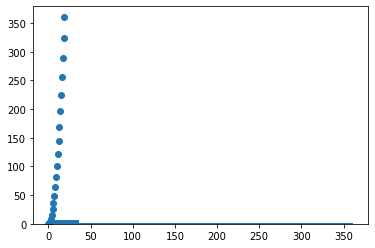

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

a = np.arange(0, 20)
b = np.power(a, 2)

plt.scatter(a, b)

The recommended way to use Matplotlib is through figures and axes. 

A figure is similar to an image - a collection of (usually) one or more axes. Axes are what you would usually call plots - a painted region with some associated data. Axes contain the plots we would draw - lineplots, scatterplots, boxplots etc.

----

This is the common idiom for creating an axes.

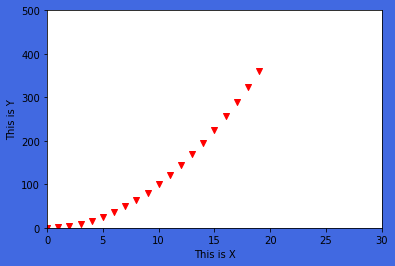

In [ ]:
fig, ax = plt.subplots()

# We can change the figure paramters
fig.set_facecolor('royalblue')

# We can change the ax paramters
ax.set(xlabel='This is X', ylabel='This is Y', xlim=[0, 30],
       ylim=[0, 500])

# We can draw objects into ax, controlling the drawing specs
ax.scatter(a, b, c='red', marker='v')

# And save the figure to a file
fig.savefig('myplot.jpg', quality=100)

#### Multiple axes

However, the real flexibility of this idiom is revealed when we want to plot over more than one axes.

<class 'numpy.ndarray'>
(2, 3)


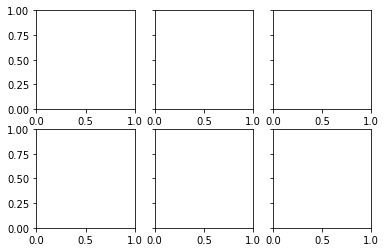

In [ ]:
# axs, as we are creating more than one
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=True) 

print(type(axs))
print(axs.shape)

`axs` is actually a 2D NumPy array - rows (0) and columns (1).

#### $\color{dodgerblue}{\text{Exercise}}$

Create a figure with a 3 X 3 array of axes. Plot some random data on the middle axes in the lower row.

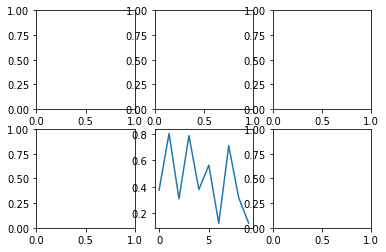

In [ ]:
fig, axs = plt.subplots(2, 3)

a = np.random.random_sample((10, ))

axs[1, 1].plot(a)

Often times, we want to plot different groups on different plots. The main idiom to do it is using a `for` loop with `zip`. 

```
for group_data, ax in zip(all_data, axs):
    ax.hist(group_data)
```

#### $\color{dodgerblue}{\text{Exercise}}$

Create a figure with a 2 X 2 array of axes. Create four different samples of values from four different normal distributions. Add unique titles so we would be able to recognize the different groups. 

Please fill the code below.  

NameError: ignored

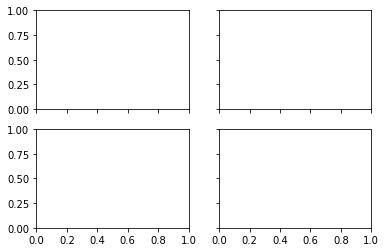

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

data = {
    'Group A': random.normal(loc=7, scale=3, size=20),
    'Group B': random.normal(loc=10, scale=3, size=20),
    'C': random.normal(loc=10, scale=9, size=20),
    'D': random.normal(loc=20, scale=3, size=20),
}

# The maximal height (i.e. most dense bin) when turning the data into histograms
maximal_bin_height = np.max(
    [histogram(data[key])[0].max() for key in data]
    )

# `ravel` Returns a flat array (1D, so we can zip it with the matching keys)
for group_name, ax in zip(data, axs.flat): 
    
    # Create a histogram of the values
    ax.hist(data[group_name])
    
    # Mark the mean of the dataset.
    ax.axvline(data[group_name].mean(), c='red', label='Group Mean')

    # Calculate standard error of the mean and turn into 95%-CI  
    ax.errorbar(x=data[group_name].mean(), 
                y=maximal_bin_height // 2,
                xerr=1.96 * sem(data[group_name]),
                c='black', capsize=8, elinewidth=3,
                label='95% CI'
                )

    ax.set_title(group_name)

ax.legend() # Add it only to the last ax.

# Removes empty "width" space, makes axes wider (`h_pad` for "height")
fig.tight_layout(w_pad=0.2) 

Matplotlib has many other features and plots, we only scratched the surface - subplotting, histograms, some annotations, lines and a scatter plot.

Here is the matplotlib [gallery of examples](https://matplotlib.org/stable/gallery/index.html), [tutorials for specific tasks](https://matplotlib.org/stable/tutorials/index.html), and a quick [styles sheet](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

Some of the work we did in this section was manual and can be skipped using higher-level tools (espcially one we will cover at a later point), however it is crucial to understand the basics of matplotlib so you can take control over your plotting.

## Pandas

pandas ('panel-data') is the main library for working with tabular data in Python on small data sets (as a rule of thumb, less than 1GB). Before learning how to read and write CSV/Excel files, we will go over the basics of pandas.

----

The main object you will work with in Pandas is a dataframe (`pd.DataFrame`).
A dataframe is a table, but it offers much more than just a matrix of values. 

![Anatomy of a dataframe](https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png) 

([source](https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png))



### Series

A dataframe is composed of columns, each series is 1-D nd-array, with axis labels. We can create a series from a list of an array of values.

In [1]:
import pandas as pd


student_grades = pd.Series(
    data=np.random.normal(90, 1.5, size=5), 
    index=list('ABCDE'), name='student_grades'
)
print(student_grades, 
    student_grades.shape,
    student_grades.values,
    student_grades.name, sep='\n\n
    ')



SyntaxError: ignored

### DataFrame

A data frame is a collection of series objects, known as columns. Dataframes are potentially hetrogenous, unlike arrays, as each column can have its own data type.

----

We will now create a dataframe but we will not give it any special column names (label-based identifier for columns - axis 1) or row names (index - label based
identifier for rows - axis 0). 

In [ ]:
import string

# Create 5 columns of 20 values each, sampled from a random distribution
random_numbers = pd.DataFrame(
    data=np.random.normal(size=(20, 5)))

# Add a 6th column that contains random strings
random_numbers[5] = np.random.choice(['dog', 'cat', 'bear', 'bird'],
                                     size=random_numbers.shape[0])

print(random_numbers,
      random_numbers.columns,
      random_numbers.index, sep='\n\n')



           0         1         2         3         4     5
0   0.679713  1.361749 -1.286552  0.946714 -0.382196  bird
1  -1.245697  1.853340 -0.693432  0.601206 -1.614123  bird
2  -0.279528  1.216805 -1.696175  0.047021  1.312008   dog
3  -0.488228  0.312635 -1.182475 -1.736417  1.378473   cat
4  -2.127332 -1.516764 -1.068095 -1.222779  0.935406   cat
5  -0.436267 -1.965412  0.708832 -0.467579  1.636009  bird
6  -0.760048 -2.025255  0.466361 -0.167379  0.423125   dog
7   1.939134  0.107420  1.599209  0.080965  0.959179  bear
8   0.126944 -0.022911 -1.070549  0.424190 -0.244310   dog
9   1.370210 -0.020233  1.555221  0.038567  0.469185  bird
10  1.406972  0.228164  0.356000 -0.412602  0.581334   dog
11 -0.976057  0.150196  0.150772 -0.671571  0.688205   dog
12 -0.850701 -0.752375  0.526427 -1.184413 -0.965632  bear
13  1.350682  0.390640 -0.606896  1.877468 -0.975378  bird
14 -0.388483 -0.360819  1.593119  0.457877  0.930775   dog
15  0.553996  1.876800 -1.123069  0.842276  1.905310  be

We can get some information on our dataframe using `df.info` e.g., the numebr of null values on each column, their names and data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float64
 1   1       20 non-null     float64
 2   2       20 non-null     float64
 3   3       20 non-null     float64
 4   4       20 non-null     float64
 5   5       20 non-null     object 
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


#### $\color{dodgerblue}{\text{Exercise}}$
Refering to columns using an integer index doesn't add much over arrays. This is way we can use column names.

Change the name of the dataframe columns using multiple ways. Print the new column names after each change to see what happened.
*   First using assignment on creation.
*   Second, update the column names by using the `pd.DataFrame.rename` method (e.g., change names, capitalization, etc.).


In [ ]:

course_grades = pd.DataFrame(
    data=[
          # Specifying each column values for each row
          ('Python 101', 'Fall', 95, 2021), 
          ('Python 101', 'Spring', 85, 2020), 
          ('Python 101', 'Fall', 90, 2019), 
          ('Python 102', 'Fall', 95, 2021), 
          ('Python 102', 'Summer', 100, 2020), 
          ('Python 102', 'Fall', 90, 2019), 
    ], columns=['Course', 'Term', 'Average', 'Year'])

print(course_grades)

course_grades.rename(
    dict(zip(course_grades.columns, 
             ['Course Name', 'Semester', 'Mean Grade', 'Date'])), 
    axis=1)

print(course_grades) # Why has it not changed?


       Course    Term  Average  Year
0  Python 101    Fall       95  2021
1  Python 101  Spring       85  2020
2  Python 101    Fall       90  2019
3  Python 102    Fall       95  2021
4  Python 102  Summer      100  2020
5  Python 102    Fall       90  2019
       Course    Term  Average  Year
0  Python 101    Fall       95  2021
1  Python 101  Spring       85  2020
2  Python 101    Fall       90  2019
3  Python 102    Fall       95  2021
4  Python 102  Summer      100  2020
5  Python 102    Fall       90  2019


The crux of the previous exercise was that in Pandas, you have to be aware what are the effects of your actions. Many of the functions return a copy of the dataframe with the additional change from the function call, rather than change it in place by default. Using `inplace=True` is a matter of choice, but there are [debates](https://github.com/pandas-dev/pandas/issues/16529) for and against it.

### Selection

In pandas you can select columns, rows or both in multiple ways. To demonstrate and practice it we will load an example dataset from a library that we'll get to know later.

In [3]:
import seaborn as sns

# mpg (miles per gallon) is a good data set for this section as it contains 
#  both numeric and string columns

mpg = sns.load_dataset('mpg')

print(mpg.info())

mpg.head() # prints the first ten rows, to get a feel of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


We can use square brackets to retrieve a single column (i.e., a series)

In [ ]:
mpg['origin']

You can also use mpg.origin to get the same result, although alluring for newcomers, this is not recommended. 
* You cannot retrieve a column this way if it has spaces in it (`df.total price`).
* You cannot store the column name in another variable. (`x = 'col_name'; df.x`)
* You cannot retrieve a couple of columns together.

**Use square brackets syntax.**

In [ ]:
mpg[['model_year', 'weight']] # You can retrieve multiple columns in a new order

An important thing to note is that the returned values, are a *view* or a slice 
of the dataframe and not a new object. This means that changes that are applied
to it will be reflected in the original dataframe as well. 

In [ ]:
mpg['model_year'] += 1900 # This is why reassignment works here. 
mpg.head() # The original values are greater by 1900

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino


There are four main ways to select rows and columns based on an index. We will cover only two of them. 

----

#### $\color{dodgerblue}{\text{Exercise}}$

`iloc` stands for integer-location. We know that a dataframe is in some sense a collection of NumPy arrays, and we know how to index 2-D arrays. So we know how to use iloc. 

Fill the code below to select every third row (axis=0) and every second column (axis=1) in the dataframe.

In [ ]:
mpg.iloc[2::3, 1::2]
mpg.iloc[0, 1] # This returns the first row, second column

# Booleans also work (clunky for demo purposes).
#  6th row and below, mid-three columns
mpg.iloc[5:, [False, False, False, True, True, True, False, False, False]] 

,horsepower,weight,acceleration
5,198.0,4341,10.0
6,220.0,4354,9.0
7,215.0,4312,8.5
8,225.0,4425,10.0
9,190.0,3850,8.5
...,...,...,...
393,86.0,2790,15.6
394,52.0,2130,24.6
395,84.0,2295,11.6
396,79.0,2625,18.6


[iloc is flexible, but can only be fed integers. For more info take a look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html).

----

The next method of selection is `loc`, selection by label (also by boolean indexing). 

In [ ]:
mpg.loc[:, ['mpg', 'model_year']] 

,mpg,model_year
0,18.0,1970
1,15.0,1970
2,18.0,1970
3,16.0,1970
4,17.0,1970
...,...,...
393,27.0,1982
394,44.0,1982
395,32.0,1982
396,28.0,1982


In [ ]:
mpg.set_index(['name', 'origin'])

,,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
name,origin,,,,,,,
chevrolet chevelle malibu,usa,18.0,8,307.0,130.0,3504,12.0,1970
buick skylark 320,usa,15.0,8,350.0,165.0,3693,11.5,1970
plymouth satellite,usa,18.0,8,318.0,150.0,3436,11.0,1970
amc rebel sst,usa,16.0,8,304.0,150.0,3433,12.0,1970
ford torino,usa,17.0,8,302.0,140.0,3449,10.5,1970
...,...,...,...,...,...,...,...,...
ford mustang gl,usa,27.0,4,140.0,86.0,2790,15.6,1982
vw pickup,europe,44.0,4,97.0,52.0,2130,24.6,1982
dodge rampage,usa,32.0,4,135.0,84.0,2295,11.6,1982


Up until now, we didn't make use of the dataframe row-index (the row labels). They were always integer so we could just select them as on iloc, if required, the index can be turned into a string for example.

In [ ]:
mpg.set_index(['name']).loc[('toyota corolla')]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
toyota corolla,29.0,4,97.0,75.0,2171,16.0,1975,japan
toyota corolla,28.0,4,97.0,75.0,2155,16.4,1976,japan
toyota corolla,32.2,4,108.0,75.0,2265,15.2,1980,japan
toyota corolla,32.4,4,108.0,75.0,2350,16.8,1981,japan
toyota corolla,34.0,4,108.0,70.0,2245,16.9,1982,japan


However, a much cleaner way to put this in the current case (and most) would be to just use `loc` with boolean indexing.

In [ ]:
# mpg['name'] == 'toyota corolla' # rutrns a series of booleans
mpg.loc[mpg['name'] == 'toyota corolla']

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: name, Length: 398, dtype: bool

Which is very specific and flexible, but could require slightly different syntax than what we know (see below).


In [ ]:
mpg.loc[
        # Select non-japanese models
        (mpg['origin'] != 'japan') 
        # Models from 1976 or later
        & ~(mpg['model_year'] > 1975) 
        # Find if the model name name contains 'volvo or ford'
        & (mpg['name'].str.contains('volvo|ford')) 
    ] 

You've noticed that we didn't use the regular `and` and `not` keywords when chaining arguments. Here you are required to use bitwise-operators.

The short version is:
* When chaining conditions use paranthesis. 
* Instead of `and` use `&`
* Instead of `or` use `|`
* Instead of `not` use `~`

If you want the long version, go [here](https://towardsdatascience.com/bitwise-operators-and-chaining-comparisons-in-pandas-d3a559487525). 

### Setting and mutating

There are multiple ways by which you can update existing values in the dataframe or add new. 

#### $\color{dodgerblue}{\text{Exercise}}$
Setting with enlargement is a method in which we "try" to index inexistent indices and set their values. Create a new column called 'kpg' (kilometers per gallon; mpg multiplied by 1.609).

In [ ]:
mpg['kpg'] = mpg['mpg'] * 1.609
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kpg
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,28.962
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,24.135
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,28.962
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,25.744
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,27.353


The same goes for adding new rows. 

In [ ]:
# We are using some null values for Lada, as we don't have the mpg data
mpg.loc[mpg.shape[0]] = (
    np.nan, 4, 95.69, 78, 2535.32, 23, 1977, 'soviet union', 'Lada Niva', np.nan)
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kpg
394,44.0,4,97.00,52.0,2130.00,24.6,82,europe,vw pickup,70.796
395,32.0,4,135.00,84.0,2295.00,11.6,82,usa,dodge rampage,51.488
396,28.0,4,120.00,79.0,2625.00,18.6,82,usa,ford ranger,45.052
397,31.0,4,119.00,82.0,2720.00,19.4,82,usa,chevy s-10,49.879
398,NaN,4,95.69,78.0,2535.32,23.0,1977,soviet union,Lada Niva,NaN


### GroupBy

"Group by" is a way to do one or more of the following steps: 
* Split the dataframe into groups.
* Apply a function to each group (e.g., calculate summary statistics).
* Recombine the results into a dataframe.



In [ ]:
mpg.groupby(['origin', 'cylinders']).mean().round(2)

mpg  displacement  ...  model_year    kpg
origin cylinders                       ...                   
Russia 4          23.76         99.41  ...     1999.00  38.23
europe 4          28.41        104.22  ...       75.51  45.71
       5          27.37        145.00  ...       79.00  44.03
       6          20.10        159.75  ...       78.25  32.34
japan  3          20.55         72.50  ...       75.50  33.06
       4          31.60         99.77  ...       77.51  50.84
       6          23.88        156.67  ...       78.00  38.43
usa    4          27.84        124.28  ...       78.03  44.80
       6          19.66        226.28  ...       75.64  31.64
       8          14.96        345.01  ...       73.90  24.08

[10 rows x 7 columns]

Let's break it down.

`groupby` takes column name(s) as the variable that will contain our identifiers, the names of each group. 

In [ ]:
gb = mpg.groupby('origin')
gb.groups['japan'] # Returns the indices from the original dataframe

Int64Index([ 14,  18,  29,  31,  53,  54,  57,  71,  81,  82,  84, 108, 110,
            111, 123, 129, 131, 144, 145, 149, 150, 167, 171, 173, 181, 198,
            204, 205, 210, 216, 220, 235, 239, 241, 243, 246, 247, 248, 267,
            268, 270, 273, 279, 294, 303, 310, 312, 318, 319, 320, 321, 322,
            324, 329, 331, 333, 334, 337, 343, 345, 346, 347, 348, 349, 355,
            356, 357, 358, 361, 362, 376, 377, 380, 381, 382, 383, 384, 385,
            390],
           dtype='int64')

We can grab a specific group from the groupby object:

In [ ]:
usa = gb.get_group('usa')
usa.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kpg
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu,28.962
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320,24.135
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite,28.962
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst,25.744
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino,27.353


We can apply all sorts of transformations or aggregations on the group.

In [ ]:
usa.agg('mean') # usa.agg(my_unique_agg_function)
usa.mean()

mpg               20.083534
cylinders          6.248996
displacement     245.901606
horsepower       119.048980
weight          3361.931727
acceleration      15.033735
model_year        75.610442
kpg               32.314406
dtype: float64

And we can iterate over groups, which is a common matplotlib-pandas idiom.

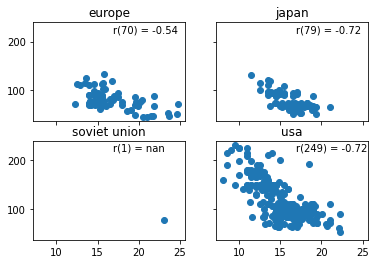

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

for (group_name, group_df), ax in zip(gb, axs.flat):
    ax.scatter(*group_df[['acceleration', 'horsepower']].values.T)
    ax.set_title(group_name)
    ax.annotate(f'r({group_df.shape[0]}) = ' +
        f"{group_df[['acceleration', 'horsepower']].corr().min().iloc[0]:.2f}",
        xy=(0.525, 0.9,), xycoords='axes fraction')
    


And offers more control compared with the built-in plotting in pandas, which is much more useful for simple exploration. See [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

Text(0.525, 0.9, 'r(398) = -0.69')

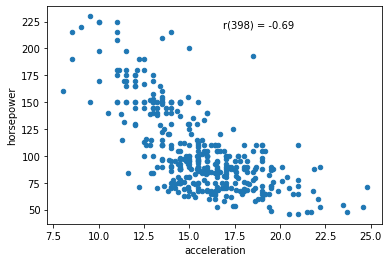

In [5]:
ax = mpg.plot.scatter('acceleration', 'horsepower', )
ax.annotate(f'r({mpg.shape[0]}) = ' +
        f"{mpg[['acceleration', 'horsepower']].corr().min().iloc[0]:.2f}",
        xy=(0.525, 0.9,), xycoords='axes fraction')

OK. So we have our aggregated dataframe, and we know what was each step in making it.

#### $\color{dodgerblue}{\text{Exercise}}$

Aggregate the mean and standard deviation of the dataframe, by `origin` and `cylinders`.

In [ ]:
grouped = mpg.groupby(['origin', 'cylinders']).agg(['mean', 'std']).round(2)
grouped.head()

mpg       displacement  ... model_year    kpg       
                   mean   std         mean  ...        std   mean    std
origin cylinders                            ...                         
europe 4          28.41  6.44       104.22  ...       3.49  45.71  10.37
       5          27.37  8.23       145.00  ...       1.00  44.03  13.24
       6          20.10  7.07       159.75  ...       2.06  32.34  11.38
japan  3          20.55  2.56        72.50  ...       3.70  33.06   4.13
       4          31.60  5.44        99.77  ...       3.70  50.84   8.75

[5 rows x 14 columns]

The result is a `MultiIndex`ed data frame. Here are the basics. See more [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html).

----

Simple indexing, returning a column.

In [ ]:
grouped['mpg']['mean']

origin        cylinders
europe        4            28.41
              5            27.37
              6            20.10
japan         3            20.55
              4            31.60
              6            23.88
soviet union  4              NaN
usa           4            27.84
              6            19.66
              8            14.96
Name: mean, dtype: float64

The indexing with MultiIndex can get very complicated. 

In [ ]:
grouped.loc[(slice('europe', 'japan'), slice(None)), ('mpg', 'mean')]

origin  cylinders
europe  4            28.41
        5            27.37
        6            20.10
japan   3            20.55
        4            31.60
        6            23.88
Name: (mpg, mean), dtype: float64

Note that the origin and cylinders columns are now missing from the dataframe, they were turned into row indices (so far we only seen integers). We have shown how we can use them in reindexing operation. But sometimes we would want to return them to the data frame (e.g., if we want to use them on further analysis). 

In [ ]:
 # Note that this returns a new dataframe, we can also use `inplace` argument.
grouped.reset_index(level='origin')

origin    mpg        ... model_year    kpg       
                          mean   std  ...        std   mean    std
cylinders                             ...                         
4                europe  28.41  6.44  ...       3.49  45.71  10.37
5                europe  27.37  8.23  ...       1.00  44.03  13.24
6                europe  20.10  7.07  ...       2.06  32.34  11.38
3                 japan  20.55  2.56  ...       3.70  33.06   4.13
4                 japan  31.60  5.44  ...       3.70  50.84   8.75
6                 japan  23.88  4.95  ...       3.22  38.43   7.97
4          soviet union    NaN   NaN  ...        NaN    NaN    NaN
4                   usa  27.84  4.55  ...       3.64  44.80   7.32
6                   usa  19.66  3.37  ...       3.22  31.64   5.43
8                   usa  14.96  2.84  ...       3.02  24.08   4.56

[10 rows x 15 columns]

Or skip this in the first place.

In [ ]:
mpg.groupby(['origin'], as_index=False).mean()

,origin,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,kpg
0,europe,27.891429,4.157143,109.142857,80.558824,2423.300000,16.787143,75.814286,44.877309
1,japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038,48.995068
2,soviet union,NaN,4.000000,95.690000,78.000000,2535.320000,23.000000,1977.000000,NaN
3,usa,20.083534,6.248996,245.901606,119.048980,3361.931727,15.033735,75.610442,32.314406


### Transform

Often we would want the aggregation operation to return a data structure that has the same dimensions as the original. For example, when we want to add summary statistics of each group or subject (e.g., think of an experiment with many trials per participant). 

----


`assign` is a function that returns a new dataframe with an additional column, and can be used for elegant chaining.

In [ ]:
mpg.assign(
    weight_by_origin=mpg.groupby(
        'origin', sort=False)['weight'].transform('mean')).tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kpg,weight_by_origin
394,44,4,97.00,52.0,2130.00,24.6,82,europe,vw pickup,70.796,2423.300000
395,32,4,135.00,84.0,2295.00,11.6,82,usa,dodge rampage,51.488,3361.931727
396,28,4,120.00,79.0,2625.00,18.6,82,usa,ford ranger,45.052,3361.931727
397,31,4,119.00,82.0,2720.00,19.4,82,usa,chevy s-10,49.879,3361.931727
398,mean,4,95.69,78.0,2535.32,23.0,1977,soviet union,Lada Niva,mean,2535.320000


Note that we have an `NaN` for some for some of the columns, espcially `horsepower`. 



In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 398
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     399 non-null    int64  
 2   displacement  399 non-null    float64
 3   horsepower    393 non-null    float64
 4   weight        399 non-null    float64
 5   acceleration  399 non-null    float64
 6   model_year    399 non-null    int64  
 7   origin        399 non-null    object 
 8   name          399 non-null    object 
 9   kpg           398 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 54.3+ KB


One way of imputation is to fill the missing values with some cetral tendency measure. We can do it with the mean or median, for example.



#### $\color{dodgerblue}{\text{Exercise}}$

Fill in the code below, returning the `horsepower` column where missing values will be filled with the dataset median for the column. 

In [ ]:
mpg['horsepower'].fillna(mpg['horsepower'].agg('median'))

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
394     52.0
395     84.0
396     79.0
397     82.0
398     78.0
Name: horsepower, Length: 399, dtype: float64

If we want to fill the missing values in the column using the mean of a specific group, here is one option. 

Note the use of the `values` attribute. This ensures that the assignment is of a NumPy array rather than a view of the data frame. 

----

`describe` is a method to get a quick summary of the different columns. 

In [ ]:
mpg['horsepower'] = mpg['horsepower'].fillna(mpg.groupby('cylinders')['horsepower'].transform(
    'mean')).values
mpg.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,kpg
count,398.00,399.00,399.00,399.00,399.00,399.00,399.00,398.00
mean,23.51,5.45,193.18,104.07,2969.33,15.59,80.77,37.83
std,7.82,1.70,104.25,38.29,846.06,2.78,95.24,12.58
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,14.48
25%,17.50,4.00,102.50,76.00,2224.50,13.85,73.00,28.16
50%,23.00,4.00,146.00,92.00,2800.00,15.50,76.00,37.01
75%,29.00,8.00,262.00,125.00,3607.00,17.20,79.00,46.66
max,46.60,8.00,455.00,230.00,5140.00,24.80,1977.00,74.98


### I / O

So far we either created our dataframes by hand, or imported them from a built-in dataset. However, usually you would be working on files.

Now is a good time to tell you that Colab runs on a Linux-based machine. As with any computer, we have folders. 

We can use the exclamation mark to run commands on the shell ("Command prompt") of our current machine. This will be very useful later when we get to installing new libraries, which are not already installed on Colab. 

Here is the current folder contensts, and the contensts of the `sample_data` folder that colab offers us.

In [ ]:
! dir . # Revelas the files in the current folder

sample_data


In [ ]:
! dir ./sample_data # Revelas the files in the folder below the current

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


We see that Colab offers us two famous datasets "mnist" and "california housing". The files are split into training and testing datasets, so we can easily train a machine learning model to the training set and test on the test set. 

We will use these files to demonstrate how we read and write data to and from files.

#### $\color{dodgerblue}{\text{Exercise}}$

Fill in the code below to load the california datasets. 

In [ ]:
train = pd.read_csv('sample_data/california_housing_train.csv')
test = pd.read_csv('sample_data/california_housing_test.csv')

Here we combine the two files, by concatenating the two dataframes. 

In [ ]:
df = pd.concat(
    [train, test]
)

## Another option would be 
# df = train.append(test)

#### $\color{dodgerblue}{\text{Exercise}}$

Fill in the code below to save the new dataframe into a CSV file named 'california_combined', place it in the same directory as the original files. 

In [ ]:
df.to_csv('sample_data/california_combined.csv', index=False)

Now let's see if we saved it correctly. 

In case you are not using Colab, Jupyter Notebook or a similar tool, you might want to use the some module to view files and folders on disk from within Python. One out of many options here would be:

In [ ]:
import glob # Elegantly filter the list of files in the folder
glob.glob('sample_data/*.csv')
# glob.glob('sample_data/[cali]*.csv')

['sample_data/california_combined.csv',
 'sample_data/california_housing_test.csv',
 'sample_data/california_housing_train.csv']

Pandas can work with many [other formats](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) except CSV, like Excel, SPSS, Stata, and more. The process is pretty much the same as we did here.  

### Misc.



Often times we want to view the individual values in a specific column or the whole dataframe. `unique` and `value_counts` are useful here. 

In [ ]:
print(mpg['name'].value_counts(), 
      mpg['name'].unique(), sep='\n\n')

Note that to do the same we will need to use the `apply` method, that iterates over the columns (or rows). 

In [ ]:
print(mpg[['cylinders', 'origin']].apply(pd.Series.unique))

## A more common form would be 
mpg[['cylinders', 'origin']].apply(lambda s: s.unique())

cylinders                       [8, 4, 6, 3, 5]
origin       [usa, japan, europe, soviet union]
dtype: object



#### query


`query` is a row-selection method of pandas dataframes that can be very elegant, espcially after long chaining operations. 

Say we want to take all models weighting more than 2000 which were in made USA. Than we take only the summary of the groups who make less than 25 miles per gallon. 

Consider the two following options:

In [ ]:
# This is verbose and error prone
# We need to groupby etc. inside loc to get the same dimensions
mpg.loc[(
    mpg['weight'] > 2000) & (mpg['origin'] == 'usa')].groupby(
        'cylinders').median().loc[mpg.loc[(mpg['weight'] > 2000)
         & (mpg['origin'] == 'usa')].groupby('cylinders').median()['mpg'] < 25]


,mpg,displacement,horsepower,weight,acceleration,model_year
cylinders,,,,,,
6,19.0,231.0,100.0,3239.0,16.45,75.0
8,14.0,350.0,150.0,4140.0,13.00,73.0


In [ ]:
# This is succint, readable and easy to debug
mpg.query('weight > 2000 & origin == "usa"'
    ).groupby('cylinders').median().query('mpg < 25')


,mpg,displacement,horsepower,weight,acceleration,model_year
cylinders,,,,,,
6,19.0,231.0,100.0,3239.0,16.45,75.0
8,14.0,350.0,150.0,4140.0,13.00,73.0


#### where and mask

`where` is another method, which returns a copy of the dataframe, setting to `NaN` every row or cell that is not True according to the filter expression. This is useful if you want to filter rows or columns but get an object which has the same dimensions. 

In [ ]:
mpg.where(mpg['name'] == 'buick skylark 320')

The inverse of `where` is mask.

In [ ]:
mpg.mask(mpg['name'] == 'buick skylark 320')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kpg
0,18.00,8.0,307.00,130.0,3504.00,12.0,70.0,usa,chevrolet chevelle malibu,28.96200
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18.00,8.0,318.00,150.0,3436.00,11.0,70.0,usa,plymouth satellite,28.96200
3,16.00,8.0,304.00,150.0,3433.00,12.0,70.0,usa,amc rebel sst,25.74400
4,17.00,8.0,302.00,140.0,3449.00,10.5,70.0,usa,ford torino,27.35300
...,...,...,...,...,...,...,...,...,...,...
395,32.00,4.0,135.00,84.0,2295.00,11.6,82.0,usa,dodge rampage,51.48800
396,28.00,4.0,120.00,79.0,2625.00,18.6,82.0,usa,ford ranger,45.05200
397,31.00,4.0,119.00,82.0,2720.00,19.4,82.0,usa,chevy s-10,49.87900
398,23.76,4.0,103.13,83.0,2667.59,17.0,2021.0,Russia,Lada Niva Legend,38.22984


### Reshaping

Reshaping is the act of changing the structure of a dataframe, like turning rows into columns and vice versa (e.g., "Pivot table"). 

As with any task, Pandas offers a variety of reshaping options. Here are the basics.

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
pivotted = pd.pivot_table(tips, 
               values=['total_bill', 'tip'], index=['smoker', 'time'], 
               columns='size',
               aggfunc='sum') # Can also be median, your own function, etc.

pivotted

tip                        ... total_bill                      
size              1       2      3      4  ...          3       4      5      6
smoker time                                ...                                 
Yes    Lunch   1.92   47.04   7.23   9.00  ...      35.18   63.64    NaN    NaN
       Dinner  1.00  131.79  41.91  34.92  ...     303.12  273.06  58.61    NaN
No     Lunch   1.83   78.96   6.54  12.09  ...      57.44   86.11  41.19  91.15
       Dinner  1.00  145.05  73.26  97.00  ...     488.81  635.89  50.54  48.17

[4 rows x 12 columns]

Reshaping wide dataframe to long can be achieved usign stack.

In [ ]:
tips.groupby(['smoker']).mean().stack().reset_index().rename(
    columns={'level_1': 'Variable', 0: 'Mean Value'}
)

,smoker,Variable,Mean Value
0,Yes,total_bill,20.756344
1,Yes,tip,3.008710
2,Yes,size,2.408602
3,No,total_bill,19.188278
4,No,tip,2.991854
5,No,size,2.668874


Crosstabbing is another common operation. 

In [ ]:
pd.crosstab(tips['smoker'], tips['time'])

time,Lunch,Dinner
smoker,,
Yes,23,70
No,45,106


That's it for pandas, we merely scratched the surface. We didn't cover some very powerful features like windowed operations (e.g., cumulative\rolling sum), time series and categorical data. To continue on your own, head over [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html). 

## Seaborn

Seaborn is a visualiztion library (like Matplotlib), but is built on top of Matplotlib. 

In [11]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Seaborn offers many types of plots. Most can be drawn straight onto your subplots object and using variables taken straight from a data frame. 

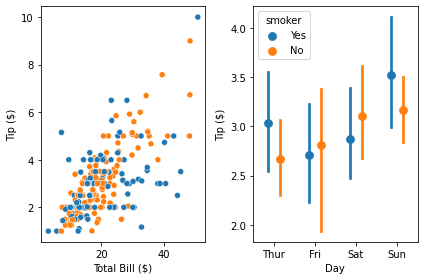

In [ ]:
fig, axs = plt.subplots(1, 2)

ax1 = sns.scatterplot(
    data=tips, x='total_bill', y='tip', hue='smoker', 
    ax=axs[0],
    legend=None,
)

ax1.set(xlabel='Total Bill ($)', ylabel='Tip ($)')



ax2 = sns.pointplot(
    data=tips, x='day', y='tip', hue='smoker',
    ax=axs[1],
    join=False, err_style="bars", dodge=0.3
)

ax2.set(xlabel='Day', ylabel='Tip ($)')

fig.tight_layout()

#### $\color{dodgerblue}{\text{Exercise}}$

Generate a figure with subplots in a 3X1 array.
Using the `tips` dataset, draw the following from topmost to bottommost.

* A horizontal boxplot (`sns.boxplot`) of the number of guests in a party (`size`) on each day. Seperate the boxes into different hues based on the sex of the person paying the waiter.  
* A histogram (`sns.histplot`) of the relative size of `tip` to `total_bill`, with the color of the hisograms based on the whether there is a `smoker` in the party. 
* A line (`sns.lineplot`) showing the trend in `total_bill`' across the values of `size`. Set the style of the lines to whether there is a smoker in the party. 

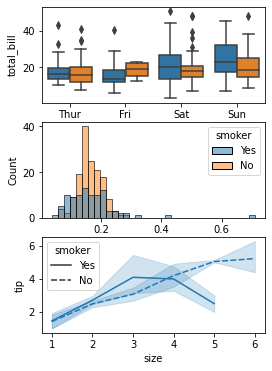

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(4, 6))

sns.boxplot(ax=axs.flat[0], data=tips, x='day', y='total_bill', hue='smoker')
axs.flat[0].legend().remove()

sns.histplot(ax=axs.flat[1], data=tips, x=tips['tip'] / tips['total_bill'], 
             hue='smoker', alpha=0.5)

sns.lineplot(data=tips, ax=axs.flat[2], x='size', y='tip', 
             style='smoker')

The plots we used so far are axes-level plots. They can either accept an `ax` argument or return a new ax if not given one be to plotted on. 



In [ ]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


True

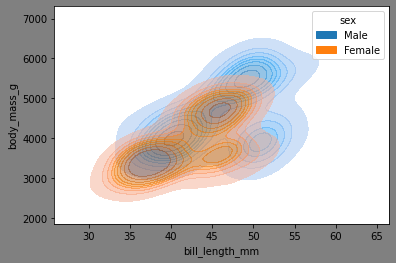

In [ ]:
ax = sns.kdeplot(data=df, x='bill_length_mm', y='body_mass_g', 
                 hue="sex", fill=True, alpha=0.5)
type(ax)

# If we want a handle to the Figure object that Seaborn did not give us
fig = plt.gcf()
fig.set_facecolor('grey')

ax == fig.axes[0]



Seaborn also can generate figure level plots. 

They do not accept an `ax` argument, and are drawn into their own object, usually one that inherits properties from the Matplotlib Figure class.

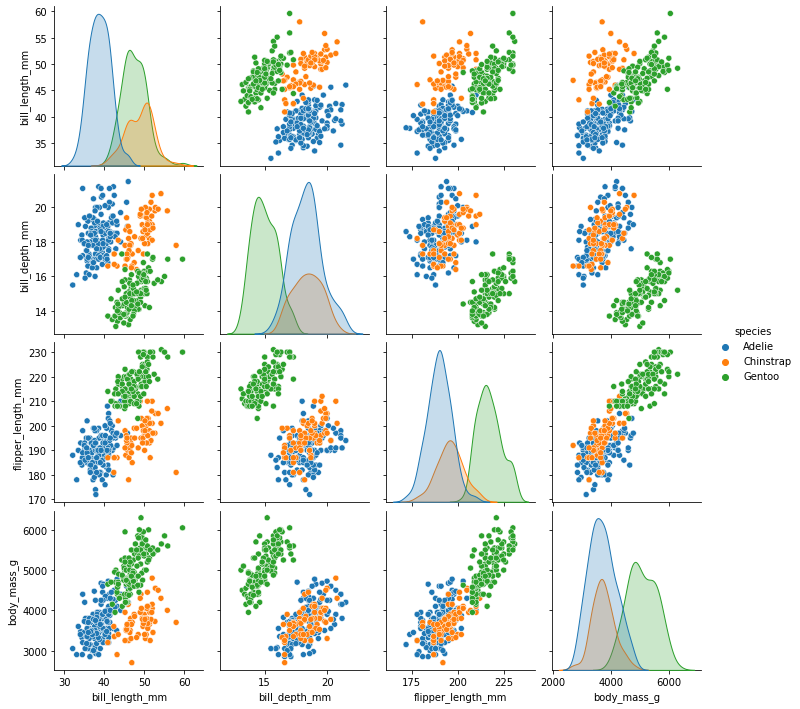

In [ ]:
pairplot_grid = sns.pairplot(df, hue="species")
print(pairplot_grid.axes) # Just like a Figure

In [ ]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Another illustrative multi-grid plot. 

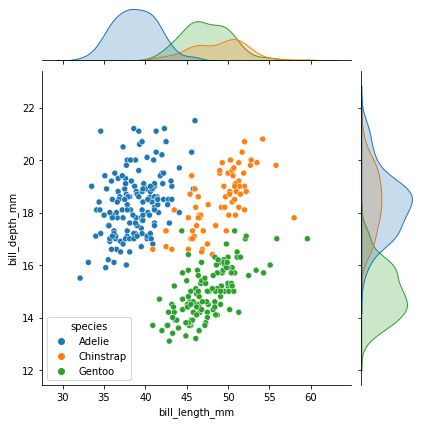

In [ ]:
marginal_hist = sns.jointplot(data=df, x='bill_length_mm',
                              y='bill_depth_mm',
                              hue="species")


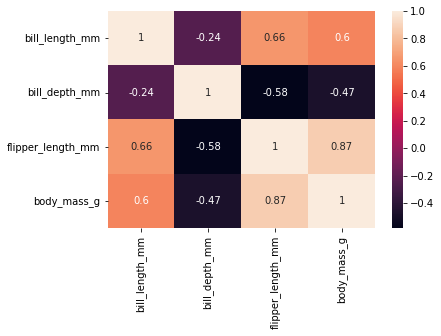

In [ ]:
sns.heatmap(df.corr(), annot=True)

To sum up, most multi grid plots are very useful for exploration of data. 

One last thing to learn about Seaborn is it's `FacetGrid` object. While offering slightly less control than directly using subplots and looping over groups from a GroupBy operation, it can produce nice graphs quickly. See more [here](https://seaborn.pydata.org/tutorial/axis_grids.html#grid-tutorial).

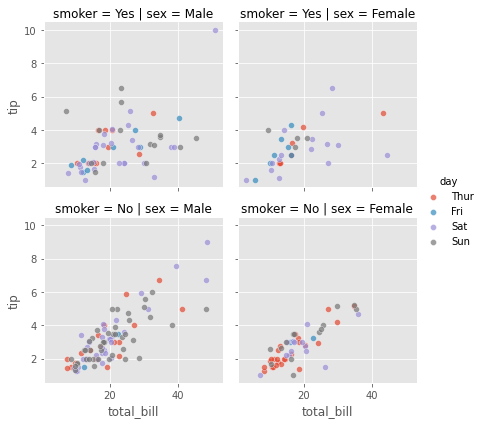

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot') # Set a nice scheme

g = sns.FacetGrid(tips, col="sex", row="smoker", hue='day')
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

Statistical Analyses with Python

There are several libraries in Python that make common statistical tests accessible. 

## Statsmodels

Statsmodels is one of the major statistics libraries in Python (there is a slightly less rich statistics module under `scipy`, see [here](https://docs.scipy.org/doc/scipy/reference/reference/stats.html)). We will touch very briefly on two common analyses using statsmodels.



#### Independent Samples t-test


Here we will test a simple hypothesis about the penguins dataset. As you can see, the `bill_length_mm` attribute is different between the three species. 

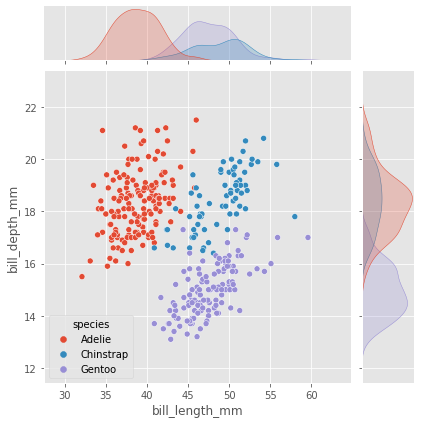

In [ ]:
penguins = sns.load_dataset('penguins')

sns.jointplot(data=penguins, x='bill_length_mm',
                              y='bill_depth_mm',
                              hue="species")


#### $\color{dodgerblue}{\text{Exercise}}$

Statsmodels t-test function receives two arrays x1 and x2, and some other argumensts. 

Use the Penguin data set to test the hypothesis that the bill length of the `Adelie` species is smaller than that of the `Chinstrap` group.

Sample 8 observations from each group. 

Use a p-value of 0.001.

Print out the results using `str.format` method or an f-string.

In [ ]:
# Some imports for the following examples
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.formula.api import ols

penguins = sns.load_dataset('penguins')
n = 8
dependent_var = 'bill_length_mm'

adelie_data = penguins.query('species == "Adelie"').sample(
    n=n, random_state=42)[dependent_var]
chinstrap_data = penguins.query('species == "Chinstrap"').sample(
    n=n, random_state=42)[dependent_var]

t, p_value, dof = ttest_ind(adelie_data, chinstrap_data, 
                           alternative='smaller')

print(f't({dof}) = {t:.2f}, p-value = {p_value:.3f}')
p_value < .001

t(14.0) = -8.38, p-value = 0.000


True

#### Linear regression

Linear regression is another common statistical analysis. Let's use it to predict the bill depth using flipper length and species (as a dummy variable). Then we will see how our model generalizes in prediction. 

In [ ]:
train, test = train_test_split(penguins.dropna(), test_size=0.2, random_state=10)

Let's first look at our data. 

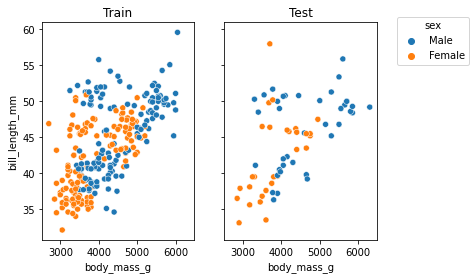

In [ ]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
for group_name, group_df, ax in zip(['Train', 'Test'], [train, test], axs.flat):
    ax2 = sns.scatterplot(data=group_df, x='body_mass_g',
                              y='bill_length_mm',
                              hue="sex", ax=ax)
    ax.set_title(group_name)
axs[0].legend().remove()
axs[1].legend(bbox_to_anchor=(1.1, 1.05), title='sex')


In [ ]:
reg = ols('bill_length_mm ~ C(sex) * body_mass_g', data=train.dropna()).fit() 

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:         bill_length_mm   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     52.41
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           1.45e-26
Time:                        15:02:22   Log-Likelihood:                -762.88
No. Observations:                 266   AIC:                             1534.
Df Residuals:                     262   BIC:                             1548.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

We see that only the `body_mass_g` variable is a statistically significant predictor for `bill_length_mm`, while `sex` or their interaction isn't significant.

Now let's use our regression model to compare the fit for the training and testing samples. 

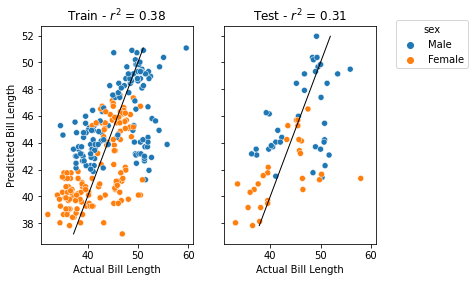

In [ ]:
train['predicted_values'] = reg.predict()
test['predicted_values'] = reg.predict(test)

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
for group_name, group_df, ax in zip(
    ['Train', 'Test'], [train, test], axs.flat):

    sns.scatterplot(data=group_df, x='bill_length_mm',
                              y='predicted_values', alpha=1,
                              hue="sex", ax=ax)
    
    y_min, y_max = group_df['predicted_values'].describe()[['min', 'max']].values

    ax.set(
        # xlim=group_df['bill_length_mm'].describe()[['min', 'max']].values, 
        #    ylim=(y_min, y_max), 
           xlabel='Actual Bill Length',
           ylabel='Predicted Bill Length')
    
    X_ref = Y_ref = np.linspace(y_min, y_max, 100)
    ax.plot(X_ref, Y_ref, color='black', linewidth=1)
    
    r_square = (
        group_df[['bill_length_mm', 'predicted_values']].corr().pow(2).min().iloc[0])
    ax.set_title(f'{group_name} - $r^{2}$ = {r_square:.2f}')

axs[0].legend().remove()
axs[1].legend(bbox_to_anchor=(1.1, 1.05), title='sex')



## Installing libraries

To install packages in Python need to use a package manager. Luckily, Colab comes with `pip`, the package installer for Python. A package manager keeps track of what packages you have on your current environment, and installs/updates packages accordingly when you want to install a new package. 


In [ ]:
# To get a list of the installed libraries
! pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.2
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl

In [ ]:
!pip install pingouin

     |████████████████████████████████| 206 kB 5.1 MB/s 
     |████████████████████████████████| 28.5 MB 48 kB/s 
     |████████████████████████████████| 9.8 MB 47.0 MB/s 
  Created wheel for pingouin: filename=pingouin-0.4.0-py3-none-any.whl size=206904 sha256=9d1bbdef80dba8dd60aa0f2df7cf58d3227c27c699cf60b46df8372b9a7f630d
  Stored in directory: /root/.cache/pip/wheels/8a/9d/c4/11677c2c4d5c0df9d1d4aa61528d868bb96e13b898e3f51c95
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=73add08a115edd20857d886f5c8bbc3d97574110b0ea3980912c0cf6b01039e4
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmo


### Pingouin

We just installed Pingouin, a Pandas based library useful for many common statistical tests, and to some more accessible than `statsmodels` (although
statsmodels enjoys a variety of models). 



#### $\color{dodgerblue}{\text{Exercise}}$

Import `Pingouin` and load the `attention` dataset from `Seaborn`. 
conduct a repeated-measures ANOVa using Pingouin, with the following parameters:

* `subject` is the participant ID.
* `attention` is the between group factor.
* `solutions` is the within group (repeated) factor. 
* `score` is the dependent variable. 

In [ ]:
import pingouin as pg
import seaborn as sns
df = sns.('attention')

In [ ]:
pg.mixed_anova(
    data=df, 
    dv='score', 
    between='attention', 
    within='solutions',
    subject='subject',
    correction=False,
    effsize="np2")


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,attention,42.504167,1,18,42.504167,17.598045,0.000544,0.494354,NaN
1,solutions,14.408333,2,36,7.204167,6.590851,0.003639,0.268020,0.721947
2,Interaction,15.408333,2,36,7.704167,7.048285,0.002612,0.281388,NaN
